<div align='center' style='font-size:100%'>Numerical Simulation of Computational Models with</div>
<br>
<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/tell-roadrunner.png" width="75%" style="padding: 20px"></div>
<div align='center' style='font-size:100%'>
Veronica L. Porubsky, BS
<div align='center' style='font-size:100%'>Sauro Lab PhD Student, Department of Bioengineering<br>
Seminar Coordinator, <a href="https://reproduciblebiomodels.org/dissemination-and-training/seminar/">Center for Reproducible Biomedical Modeling</a><br>
University of Washington, Seattle, WA USA
</div>
<hr>

Note: the layout of this Jupyter notebook is optimized for a <a href="https://rise.readthedocs.io/en/maint-5.5/">RISE slideshow</a><br>

# Links to relevant resources:

<a href="https://github.com/sys-bio/tellurium#installation-instructions">Tellurium installation instructions</a><br>
<a href="https://tellurium.readthedocs.io/en/latest/">Tellurium documentation</a><br>
<a href="https://libroadrunner.readthedocs.io/en/latest/">libRoadRunner documentation</a><br>
<a href="https://tellurium.readthedocs.io/en/latest/antimony.html">Antimony documentation</a><br>
<a href="http://phrasedml.sourceforge.net/phrasedml__api_8h.html">PhraSED-ML documentation</a><br>
<a href="https://nanohub.org/resources/tellurium">Tellurium environment on nanoHUB</a><br>

Note: Tellurium and libRoadRunner do not currently support Python 3.7. To use a Python 3.6 distribution without altering the distribution on your local machine, download the Tellurium Spyder IDE, notebook, use nanoHUB, or run this Jupyter notebook on Google Colaboratory.

# What is kinetic modeling?

<ul>
  <li>Chemical kinetics studies the factors that influence the rate of chemical reactions</li>
     <ul class="square">
      <li>e.g. concentration, temperature, light, catalysts, etc. </li>
     </ul>
  <li>Chemical reaction networks are the framework for building all types of dynamical models</li>
        <ul class="square">
          <li>Genetic circuits</li>
          <li>Cell signaling pathways</li>
          <li>Metabolic networks</li>
        </ul>
  <li>Types of kinetic models:</li>
    <ul class="square">
      <li>Agent-based</li>
      <li>Algebraic</li>
      <li>Boolean</li>
      <li>Constraint based</li>
      <li>Differential equations</li>
      <li>Statistical and machine learning methods</li>
      <li>Stochastic</li>
    </ul>
</ul>

# How does numerical simulation help us model kinetics?

<ul>
  <li>Provides a method to approximate analytical solutions for complex (often non-linear) systems</li>
  <li>Kinetic laws describe the rates of change of species in the system, which can be modeled mathematically</li>
  <li>For a sufficiently large network, simulators must be efficient and perform rapid numerical integration</li>
</ul>


# What are differential equations models?

<ul class="roman">
 <li>Models which describe how variables in a system evolve over time</li>
 <ul class="square">
  <li>e.g. floating species concentrations</li>
 </ul>
 <li>Quantities are derived from the variables</li>
  <ul class="square">
  <li>e.g. pathway flux</li>
 </ul>
 <li>Some parameters of the model are fixed by the modeler</li>
   <ul class="square">
  <li>e.g. rate constants</li>
  <li>e.g. enzyme concentrations</li>
  <li>e.g. boundary species concentrations</li>
 </ul>
 <li>Deterministic differential equations models are useful when we can assume there are a large number of participants in the chemical reactions</li>
 <li>Stochastic models are useful for dilute systems in which reactions may not occur at every timepoint</li>
</ul>

# Tellurium and libRoadRunner support rapid simulation and analysis of kinetic models

<br>
<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/tellurium-utilities.png" width="75%" style="padding: 20px"></div>

# Installing relevant packages/ libraries

In [ ]:
# First, install Tellurium, which comes with libRoadRunner 
!pip install tellurium


# Importing relevant packages

In [2]:
import tellurium as te # Python-based modeling environment for kinetic models
import roadrunner as rr # High-performance simulation and analysis library
import numpy as np # Scientific computing package
import random # Generate random numbers
import matplotlib.pylab as plt # Additional Python plotting utilities


# Writing a simple model in the Antimony language
<br>
<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/simple-antimony.png" width="75%" style="padding: 20px"></div>

In [3]:
Ant_str = """
model test               # name the model
    compartment C1;      # specify compartments
    C1 = 1.0;            # assign compartment volume
    species S1, S2;

    S1 = 10.0;           # assign species initial conditions
    S2 = 0.0;
    S1 in C1; S2 in C1;  # allocate species to appropriate compartment
    J1: S1 -> S2; k1*S1; # reaction; reaction rate law;

    k1 = 1.0;            # assign constant values to global parameters
end
"""

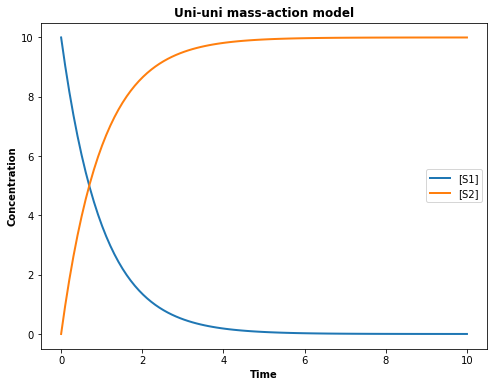

In [4]:
r = te.loada(Ant_str)  # create an executable model by loading the string to a RoadRunner object instance
r.simulate(0, 10, 100) # simulate(time_start, time_end, number_of_points)
r.plot(title = 'Uni-uni mass-action model', xtitle = 'Time', ytitle = 'Concentration', figsize = (8, 6)) 



# Adding events to an Antimony string

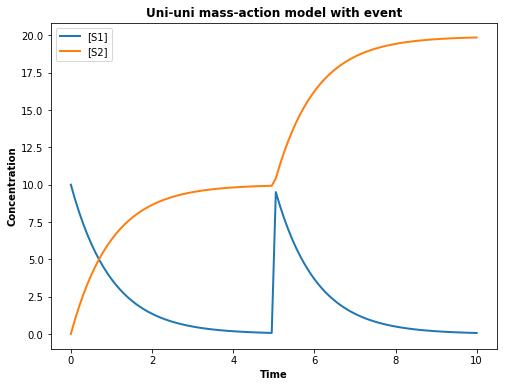

In [5]:
Ant_str = """
model test               # name the model
    compartment C1;      # specify compartments
    C1 = 1.0;            # assign compartment volume
    species S1, S2;

    S1 = 10.0;           # assign species initial conditions
    S2 = 0.0;
    S1 in C1; S2 in C1;  # allocate species to appropriate compartment
    J1: S1 -> S2; k1*S1; # reaction; reaction rate law;

    k1 = 1.0;            # assign constant values to global parameters
    
    E1: at (time > 5): S1 = 10; # add an event - spike in S1
end
"""
r = te.loada(Ant_str)  # create an executable model by loading the string to a RoadRunner object instance
r.simulate(0, 10, 100) # simulate(time_start, time_end, number_of_points)
r.plot(title = 'Uni-uni mass-action model with event', xtitle = 'Time', ytitle = 'Concentration', figsize = (8, 6)) 



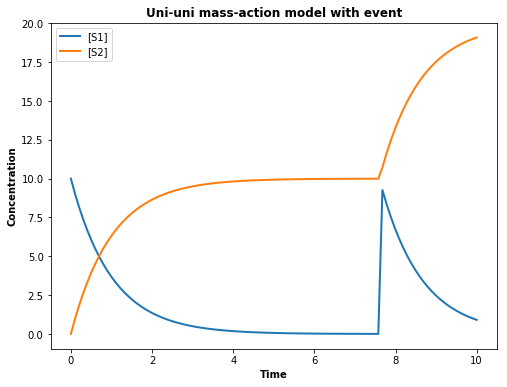

In [7]:
ant_str = """
model test               # name the model
    compartment C1;      # specify compartments
    C1 = 1.0;            # assign compartment volume
    species S1, S2;

    S1 = 10.0;           # assign species initial conditions
    S2 = 0.0;
    S1 in C1; S2 in C1;  # allocate species to appropriate compartment
    J1: S1 -> S2; k1*S1; # reaction; reaction rate law;

    k1 = 1.0;            # assign constant values to global parameters
    
    E1: at (S1 < 0.005): S1 = 10; # add an event - spike in S1
end
"""
r = te.loada(ant_str)  # create an executable model by loading the string to a RoadRunner object instance
r.simulate(0, 10, 100) # simulate(time_start, time_end, number_of_points)
r.plot(title = 'Uni-uni mass-action model with event', xtitle = 'Time', ytitle = 'Concentration', figsize = (8, 6)) 



# Stochastic simulation with Gillespie algorithm


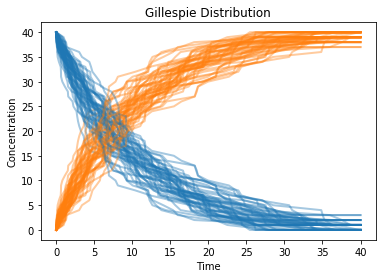

In [47]:
r = te.loada('S1 -> S2; k1*S1; k1 = 0.1; S1 = 40')
r.integrator = 'gillespie' # select the stochastic integrator - which uses the Gillespie algorithm

# Can set the seed value for the random number generator to obtain a deterministic distribution:
r.integrator.seed = 1234 

multi_run_result = []
for k in range(1, 50):
    r.reset()
    result = r.simulate(0, 40)
    multi_run_result.append(result)
    te.plotArray(result, title = 'Gillespie Distribution',\
                     xlabel = 'Time', ylabel = 'Concentration', show=False, alpha=0.4) # setting alpha value changes trajectory opacity
te.show()

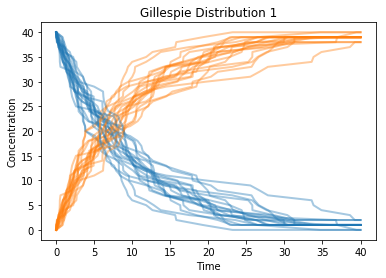

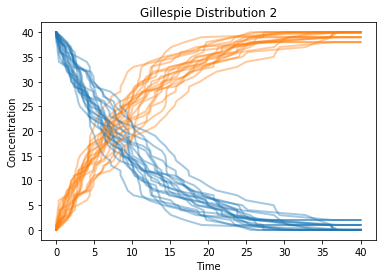

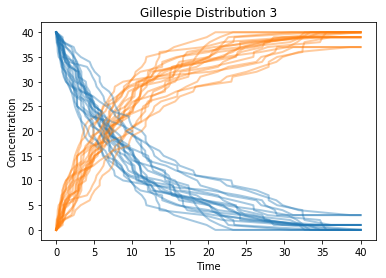

In [46]:
r = te.loada('S1 -> S2; k1*S1; k1 = 0.1; S1 = 40')
# if a seed value is not set, each run will return 
# slightly different results that approximate the same distribution

for i in range(1,4):
    plt.figure(i)
    results = []
    for k in range(1, 20):
        r.reset()
        s = r.gillespie(0, 40)
        results.append(s)
        te.plotArray(s, title = 'Gillespie Distribution ' + str(i),\
                     xlabel = 'Time', ylabel = 'Concentration', show=False, alpha=0.4)
    te.show()

# Writing an Antimony model with interactions
<br>
Repressilator circuit from Elowitz & Liebler (2000):
<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/repressilator.png" width="40%" style="padding: 20px"></div>

In [49]:
ant_str = """
// Compartments and Species:
species M1, P3, P1, M2, P2, M3;

// Reactions:
J0:  -> M1; a_m1*(Kr_P3^n1/(Kr_P3^n1 + P3^n1)) + leak1;
J1: M1 -> ; d_m1*M1;
J2:  -> P1; a_p1*M1;
J3: P1 -> ; d_p1*P1;
J4:  -> M2; a_m2*(Kr_P1^n2/(Kr_P1^n2 + P1^n2)) + leak2;
J5: M2 -> ; d_m2*M2;
J6:  -> P2; a_p2*M2;
J7: P2 -> ; d_p2*P2;
J8:  -> M3; a_m3*(Kr_P2^n3/(Kr_P2^n3 + P2^n3)) + leak3;
J9: M3 -> ; d_m3*M3;
J10:  -> P3; a_p3*M3;
J11: P3 -> ; d_p3*P3;

// Species initializations:
M1 = 0.604016261711246;
P3 = 1.10433330559171;
P1 = 7.94746428021418;
M2 = 2.16464969760648;
P2 = 3.55413750091507;
M3 = 2.20471854765531;

// Variable initializations:
a_m1 = 1.13504504342841;
Kr_P3 = 0.537411795656332;
n1 = 7.75907326833983;
leak1 = 2.59839004225795e-07;
d_m1 = 0.360168301619141;
a_p1 = 5.91755684808254;
d_p1 = 1.11075218613419;
a_m2 = 2.57306185467814;
Kr_P1 = 0.190085253528206;
n2 = 6.89140262856765;
leak2 = 1.51282707494481e-06;
d_m2 = 1.05773721506759;
a_p2 = 8.35628834784826;
d_p2 = 0.520562081730298;
a_m3 = 0.417889543691157;
Kr_P2 = 2.71031378955001;
n3 = 0.44365980532785;
leak3 = 3.63586125130783e-11;
d_m3 = 0.805873530762994;
a_p3 = 4.61276807677109;
d_p3 = 1.54954108126666;

// Other declarations:
const a_m1, Kr_P3, n1, leak1, d_m1, a_p1, d_p1, a_m2, Kr_P1, n2, leak2, d_m2;
const a_p2, d_p2, a_m3, Kr_P2, n3, leak3, d_m3, a_p3, d_p3;
"""


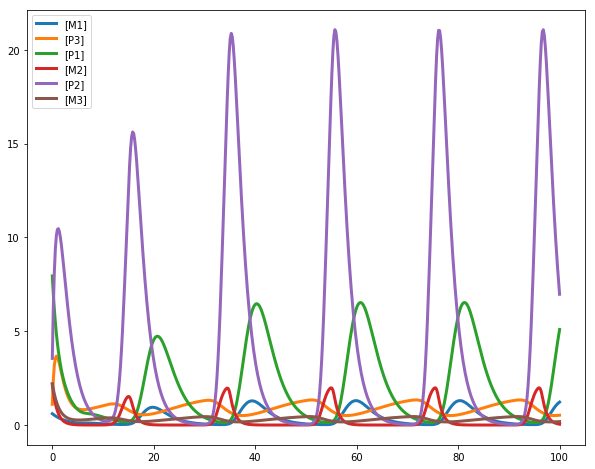

In [55]:
repressilator_ant = te.loada(ant_str)
repressilator_ant.simulate(0, 100, 500)
repressilator_ant.plot(figsize = (10, 8), linewidth = 3)


# Human-readable Antimony string

In [ ]:
#%% repressilator model SBML
print(repressilator_ant.getCurrentSBML())


In [ ]:
#%% repressilator model Antimony string
print(repressilator_ant.getAntimony())

# Import and export capabilities with Tellurium
<br>
Models can be imported from the BioModels Database, given the appropriate BioModel ID. 

We can import this model of respiratory oscillations in Saccharomyces cerevisae by Jana Wolf et al. 2001:</div>
<br>

<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/wolf_publication.PNG" width="65%" style="padding: 20px"></div>
<br>
<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/wolf_network.PNG" width="65%" style="padding: 20px"></div>

In [ ]:
#%% You can load an SBML model directly from the BioModels Database, given the BioModel ID
wolf = te.loadSBMLModel("http://www.ebi.ac.uk/biomodels-main/download?mid=BIOMD0000000090")
wolf.simulate(0, 100, 1000, ['time', 'oxy'])
wolf.plot(figsize = (10, 6), xtitle = 'Time', ytitle = 'Concentration')
 

In [ ]:
# Export the model you just accessed from BioModels to the current directory as an SBML string
wolf.reset()
wolf.getFloatingSpeciesConcentrationIds()
wolf.exportToAntimony('wolf.txt', current = True) 
# wolf.exportToSBML('wolf.xml', current = True)


In [ ]:
wolf = te.loada('wolf.txt') # load the Antimony string you just saved to the working directory
wolf.simulate(0, 200, 1000)
wolf.plot(figsize = (15, 10), xtitle = 'Time', ytitle = 'Concentration')


# Useful matrices and vectors

In [56]:
r = te.loada('S1 -> S2; k1*S1; k1 = 0.1; S1 = 40') # simple model 

# The stoichiometry matrix
print(r.getFullStoichiometryMatrix())
# short-cut
print(r.sm())


      _J0
S1 [[  -1],
S2  [   1]]

      _J0
S1 [[  -1],
S2  [   1]]



In [57]:
# The Jacobian matrix
print(r.getFullJacobian())
# short-cut
print(r.fjac())



        S1, S2
S1 [[ -0.1,  0],
S2  [  0.1,  0]]

        S1, S2
S1 [[ -0.1,  0],
S2  [  0.1,  0]]



In [58]:
# reaction rate vector
print(r.getReactionRates())
# short-cut
print(r.rv())


[4.]
[4.]


In [59]:
# the rate of change vector
print(r.getRatesOfChange())
# short-cut
print(r.dv())


    S1, S2
 [[ -4,  4]]

    S1, S2
 [[ -4,  4]]



In [60]:
# the species concentration vector
print(r.getFloatingSpeciesConcentrations())
# short-cut
print(r.sv())


[40.  0.]
[40.  0.]


In [61]:
# the names of all floating species
print(r.getFloatingSpeciesIds())
# short-cut
print(r.fs())


['S1', 'S2']
['S1', 'S2']


In [ ]:
# the names of all kinetic parameters in the model
print(r.getGlobalParameterIds())
# short-cut
print(r.ps())


# Advanced analysis with Tellurium

In [ ]:
#%% Computing Steady State
r.reset()
r.steadyState() # Bring the model to steady state using a steady state solver
print(r.getFloatingSpeciesConcentrations())


In [ ]:
#%% Computing eigenvalues for stability analysis
r.reset()
print(r.getFullEigenValues()) # compute the eigenvalues at the current state of the system


In [ ]:
#%% Parameter scans and plotting -- example of flexibility with Python programming
r = te.loada('''
   J1: $X0 -> S1; k1*X0;
   J2: S1 -> $X1; k2*S1;
   
   X0 = 1.0; S1 = 0.0; X1 = 0.0;
   k1 = 0.4; k2 = 2.3;
''')

for k1 in np.arange(0.4, 1, 0.1):
    r.k1 = k1
    r.reset()
    result = r.simulate(0, 4, 100, ['time', 'S1'])
    plt.plot(result['time'], result['S1'], label = 'k1 = ' + format(k1, ".1f"))

plt.legend(loc = 'lower right')
plt.xlabel('Time'); plt.ylabel('[S1]')
plt.show()


# Changing integrator and steady state solver settings with libRoadRunner

In [ ]:
print(rr.integrators) # shows the integrators implemented in tellurium

# cvode, from the SUNDIALS suit, is the default and performs stiff and non-stiff numerical integration


In [ ]:
print(rr.steadyStateSolvers) # shows the steady state solvers currently implemented

# nleq1 and nleq2 both implement variants of the Newton method to solve for the steady state concentrations


In [ ]:
print(r.getSteadyStateSolver()) # shows the settings for the steady state solver


In [ ]:
r.steadyStateSolver.approx_maximum_steps = 12000 # change the settings for the steady state solver


# Acknowledgements
<br>
<div align='left'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/acknowledgements2.png" width="80%"></div>

<br>
<html>
   <head>
      <title>Bibliography</title>
   </head>
   <body>
      <h1>Bibliography</h1>
      <ol>
         <li>
            <p>K. Choi et al., <cite>Tellurium: An extensible python-based modeling environment for systems and synthetic biology</cite>, Biosystems, vol. 171, pp. 74–79, Sep. 2018.</p>
         </li>
         <li>
            <p>E. T. Somogyi et al., <cite>libRoadRunner: a high performance SBML simulation and analysis library.,</cite>, Bioinformatics, vol. 31, no. 20, pp. 3315–21, Oct. 2015.</p>         
          <li>
            <p>L. P. Smith, F. T. Bergmann, D. Chandran, and H. M. Sauro, <cite>Antimony: a modular model definition language</cite>, Bioinformatics, vol. 25, no. 18, pp. 2452–2454, Sep. 2009.</p>
         </li>
         <li>
            <p>K. Choi, L. P. Smith, J. K. Medley, and H. M. Sauro, <cite>phraSED-ML: a paraphrased, human-readable adaptation of SED-ML</cite>, J. Bioinform. Comput. Biol., vol. 14, no. 06, Dec. 2016.</p>
         </li>
         <li>
            <p>J. Wolf, H. Y. Sohn, R. Heinrich, and H. Kuriyama, <cite>Mathematical analysis of a mechanism for autonomous metabolic oscillations in continuous culture of Saccharomyces cerevisiae</cite>, FEBS Lett., vol. 499, no. 3, pp. 230–234, Jun. 2001.</p>
         </li>
      </ol>
   </body>
</html>